In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path
from analysis.datasets import *
from analysis.downloads import *
from analysis.explorative_analysis import *
import seaborn as sns

### Load the Penmanshiel 09 Data, Argument is the year

In [2]:
data_merged = load_turbine_data_dynamic(2018) # merged the data file and the status file

Attempting to load file: ..\data\zenodo_turbine_data\raw\2018\Turbine_Data_Penmanshiel_09_2018-01-01_-_2019-01-01_1049.csv


In [3]:
data_raw = load_turbine_electricity_data_dynamic(2018) # pure scada data

Attempting to load file: ..\data\zenodo_turbine_data\raw\2018\Turbine_Data_Penmanshiel_09_2018-01-01_-_2019-01-01_1049.csv


In [4]:
status_raw = load_turbine_events_raw(2018) ## pure status data

Summary statistics for time frame: 2018-01-01 - 2018-12-31
First 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,7.46,1.42,4.33,11.450000,8.7,7.42,1.37,4.48,11.520000,7.50,...,NaN,NaN,NaN,NaN,NaN,3.10,0.36,0.47,NaN,NaN
2018-01-01 00:10:00,9.19,1.85,4.79,17.709999,8.7,9.15,1.74,5.34,17.030001,9.23,...,NaN,NaN,NaN,NaN,NaN,3.26,0.31,0.48,NaN,NaN
2018-01-01 00:20:00,11.25,1.70,7.20,15.740000,8.7,11.12,1.54,7.27,14.900000,11.39,...,NaN,NaN,NaN,NaN,NaN,3.33,0.42,0.51,NaN,NaN
2018-01-01 00:30:00,10.00,1.67,6.33,15.430000,8.7,9.95,1.57,6.54,14.770000,10.05,...,NaN,NaN,NaN,NaN,NaN,3.43,0.49,0.45,NaN,NaN
2018-01-01 00:40:00,9.12,1.82,5.30,15.050000,8.7,9.11,1.75,5.43,14.490000,9.14,...,NaN,NaN,NaN,NaN,NaN,3.54,0.24,0.49,NaN,NaN



Last 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2018-12-31 23:10:00,11.284520,2.162764,7.948700,15.803901,8.3,11.140615,1.559136,8.080976,14.969305,11.067036,...,52.948120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:20:00,9.209886,2.021424,5.491251,12.737600,8.3,9.521799,1.803993,6.479464,12.480263,9.406956,...,27.620852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:30:00,9.126036,1.821281,6.166250,13.335200,8.3,9.417792,1.716675,6.433489,12.789909,9.293406,...,37.375336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:40:00,9.639155,1.834346,5.800400,13.946301,8.3,9.685147,1.556248,6.434098,12.261958,9.648741,...,30.116165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:50:00,10.269620,1.718323,6.682400,14.385951,8.3,10.411116,1.357617,7.289963,14.712637,10.211990,...,41.281559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Summary statistics of the dataframe for time frame: 2018-01-01 - 2018-12-31


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
count,52290.000000,52286.000000,52286.000000,52286.000000,52560.000000,52128.000000,52124.000000,51263.000000,52124.000000,52290.000000,...,35043.000000,0.0,0.0,0.0,0.0,21739.000000,21739.000000,21739.000000,0.0,0.0
mean,6.438035,1.021481,4.145081,8.904075,7.119178,6.494586,0.875226,4.689026,8.594199,6.439444,...,22.673613,NaN,NaN,NaN,NaN,1.857765,0.317052,0.240413,NaN,NaN
std,3.645362,0.625027,2.619070,5.115901,1.036635,3.519809,0.498297,2.689892,4.626467,3.651121,...,15.273222,NaN,NaN,NaN,NaN,1.127324,0.057330,0.168245,NaN,NaN
min,0.088663,0.000000,0.000000,0.238688,5.600000,0.000000,0.000000,0.000000,0.000000,0.178975,...,3.143149,NaN,NaN,NaN,NaN,0.500000,0.160000,0.040000,NaN,NaN
25%,3.873935,0.600000,2.232763,5.229013,6.000000,4.088842,0.530807,2.902398,5.260000,3.868569,...,13.137568,NaN,NaN,NaN,NaN,0.930000,0.280000,0.100000,NaN,NaN
50%,5.759973,0.870000,3.740975,7.842275,6.900000,5.943952,0.764682,4.338736,7.769904,5.751905,...,22.243973,NaN,NaN,NaN,NaN,1.590000,0.310000,0.200000,NaN,NaN
75%,8.171383,1.272367,5.493275,11.320000,8.100000,8.272793,1.104014,6.030000,11.000000,8.178879,...,29.059157,NaN,NaN,NaN,NaN,2.640000,0.340000,0.360000,NaN,NaN
max,29.030750,5.987489,20.710501,38.459999,8.700000,29.657261,4.838177,20.974413,39.178436,28.918812,...,242.247269,NaN,NaN,NaN,NaN,16.250000,0.650000,0.960000,NaN,NaN


Expected number of entries: 52560 (2018-01-01 00:00:00 - 2018-12-31 23:50:00) 
Actual number of entries: 52560

Shape of dataframe (rows, columns) for time frame: 2018-01-01 - 2018-12-31


(52560, 299)


Checking for duplicates in the index for time frame: 2018-01-01 - 2018-12-31
Index column has no duplicates.

Rows with NaN values for Power (kW):
In total there are: 270 for time frame 2018-01-01 - 2018-12-31


time
2018-01-01 00:00:00    False
2018-01-01 00:10:00    False
2018-01-01 00:20:00    False
2018-01-01 00:30:00    False
2018-01-01 00:40:00    False
                       ...  
2018-12-31 23:10:00    False
2018-12-31 23:20:00    False
2018-12-31 23:30:00    False
2018-12-31 23:40:00    False
2018-12-31 23:50:00    False
Name: Power (kW), Length: 52560, dtype: bool


First index with NaN values:
2018-01-01 00:00:00

Last index with NaN values:
2018-12-31 23:50:00
Plotting histogram for: Power (kW) for 2018-01-01 - 2018-12-31


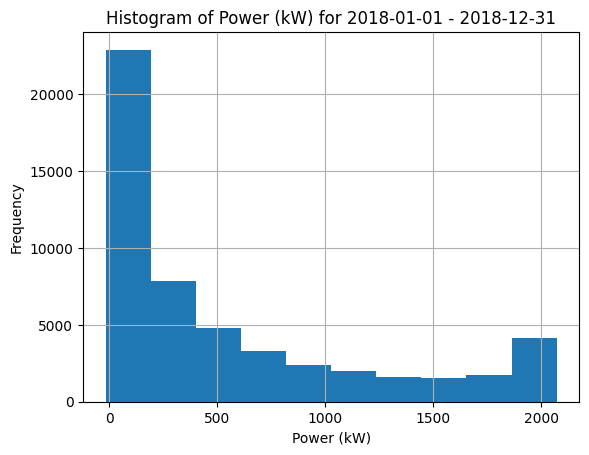


Plotting monthly time series of Power (kW) data for the time period 2018-01-01 - 2018-12-31:


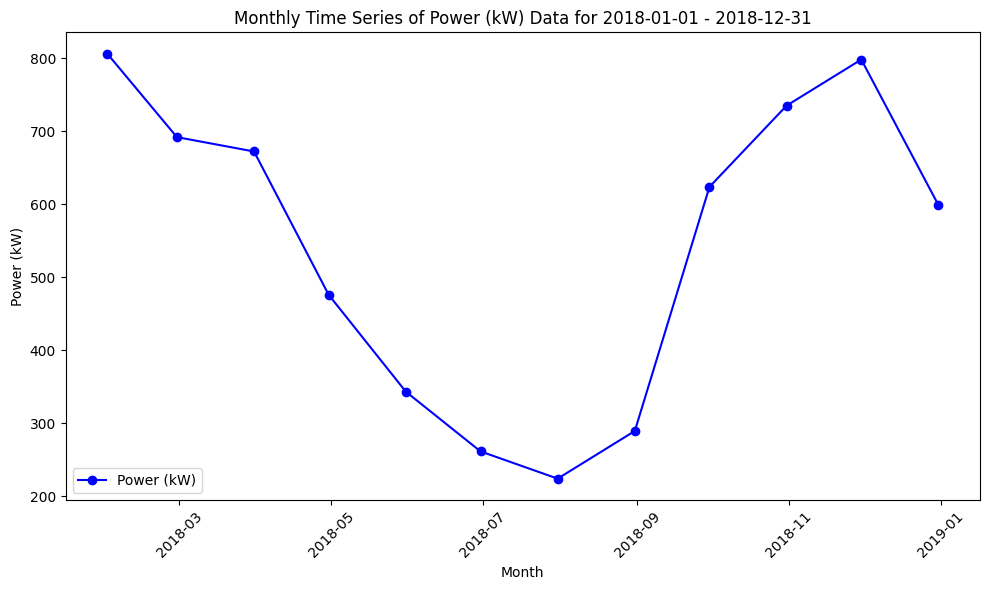

No wind speed columns found. Skipping wind speed plots.


Which year would you like to have a time series?  2018
And for which month? Please indicate using 2 digits, e.g., '01' for January:  09


Filtered data for Power (kW) in 09/2018: 4320 records found.


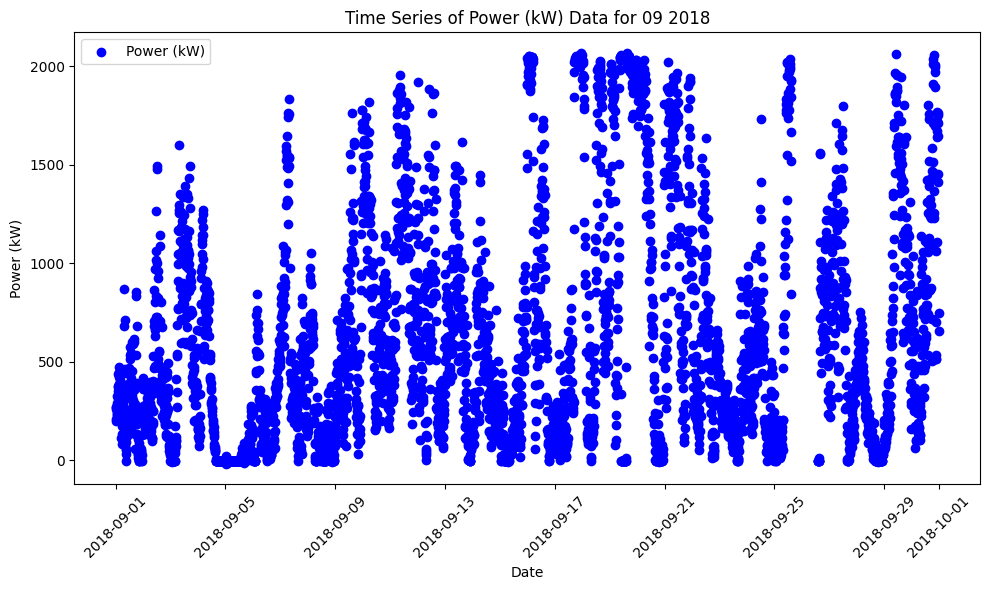

Press Enter to continue... 


In [5]:
explorative_analysis(data_raw)

#### Custom Power Curve for Wind Turbine

This section is about a custom power curve for a wind turbine based on wind speed \( v \). The idea is to use the function 1- exp(-x) to model a function that grows from zero at x = 0 to a constant value at large x. Theoretically we expect power to grow like v**3 where v is the wind speed. To obtain a better fit, I actually use a polynomial of degree 3. Since the power starts first at a minimum wind speed, I use the variable v - v_cut to shift the curve to the right. In addition, the wind turbine stops if the wind speed is to large, 22 m/s in my case. The parameters of this function are then fitted to the theoretical power curve data published by the producer (pairs wind speed, power)

$$
P(v) = 
\begin{cases} 
    0, & \text{if } v \leq v_{\text{cut}} \text{ or } v > 22 \\ 
    \left(1 - \exp \left( -\left( \lambda_1 (v - v_{\text{cut}}) + \lambda_2 (v - v_{\text{cut}})^2 + \lambda_3 (v - v_{\text{cut}})^3 \right) \right) \right) \cdot 2050, & \text{if } v_{\text{cut}} < v \leq 22
\end{cases}
$$

where:

- $ v $ is the wind speed,
- $v_{\text{cut}} = 3.8$ m/s is the cut-in wind speed,
- $\lambda_1$, $\lambda_2$, and $\lambda_3$ are constants that shape the curve,
- The maximum power output is capped at 2050 kW.

Plotting the relationship between Wind Speed and Power by defining a custom power curve function and a function to fit it to wind power data, then plot the results.
This custom power curve function controls the shape of the power curve, which starts from zero at low speeds, increases, and approaches a maximum (2050 kW, the rated power) as wind speed rises.

Theoretical wind speed and power values from the producer

In [ ]:
d = [
    [0, 0],
    [0.5, 0],
    [1, 0],
    [1.5, 0],
    [2, 0],
    [2.5, 0],
    [3, 0],
    [3.5, 0],
    [4, 55],
    [4.5, 110],
    [5, 186],
    [5.5, 264],
    [6, 342],
    [6.5, 424],
    [7, 506],
    [7.5, 618],
    [8, 730],
    [8.5, 865],
    [9, 999],
    [9.5, 1195],
    [10, 1391],
    [10.5, 1558],
    [11, 1724],
    [11.5, 1829],
    [12, 1909],
    [12.5, 1960],
    [13, 2002],
    [13.5, 2025],
    [14, 2044],
    [14.5, 2050],
    [15, 2050],
    [15.5, 2050],
    [16, 2050],
    [16.5, 2050],
    [17, 2050],
    [17.5, 2050],
    [18, 2050],
    [18.5, 2050],
    [19, 2050],
    [19.5, 2050],
    [20, 2050],
    [20.5, 2050],
    [21, 2050],
    [21.5, 2050],
    [22, 2050],
    [22.5, 0],
    [23, 0],
    [23.5, 0],
    [24, 0],
    [24.5, 0],
    [25, 0],
    [25.5, 0],
    [26, 0],
    [26.5, 0],
    [27, 0],
    [27.5, 0],
    [28, 0],
    [28.5, 0],
    [29, 0],
    [29.5, 0],
    [30, 0],
    [30.5, 0],
    [31, 0],
    [31.5, 0],
    [32, 0],
    [32.5, 0],
    [33, 0],
    [33.5, 0],
    [34, 0],
    [34.5, 0],
    [35, 0],
]


theoretical_producer_data = pd.DataFrame(d, columns=["wind_speed", "power"])

wind_speeds_theoretical = theoretical_producer_data["wind_speed"].values
power_output_theoretical = theoretical_producer_data["power"].values

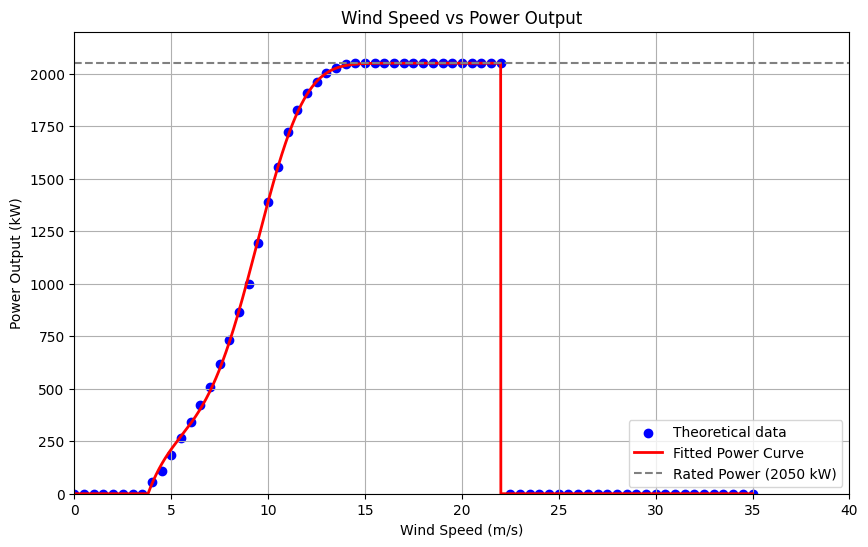

Fitted parameters:
λ1 = 0.12193998594391288, λ2 = -0.034322334838180014, λ3 = 0.007128044053741631


In [29]:
def custom_power_curve(v, lambda1, lambda2, lambda3):
    v_cut = 3.8
    return np.where(
        (v <= 3.8) | (v > 22),
        0,
        (
            1
            - np.exp(
                -(
                    lambda1 * (v - v_cut)
                    + lambda2 * (v - v_cut) ** 2
                    + lambda3 * (v - v_cut) ** 3
                )
            )
        )
        * 2050,
    )


# Fit the model to the data
initial_guess = [0.01, 0.01, 0.01]  # Initial guesses for lambda1, lambda2, lambda3
params, covariance = curve_fit(
    custom_power_curve, wind_speeds_theoretical, power_output_theoretical, p0=initial_guess
)

# Extract fitted parameters
lambda1_fitted, lambda2_fitted, lambda3_fitted = params

# Generate fitted power output
ws = np.arange(0, 35.001, 0.01)
fitted_power = custom_power_curve(ws, lambda1_fitted, lambda2_fitted, lambda3_fitted)

# Plotting the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(wind_speeds_theoretical, power_output_theoretical, color="blue", label="Theoretical data", marker="o")
plt.plot(ws, fitted_power, color="red", label="Fitted Power Curve", linewidth=2)
plt.title("Wind Speed vs Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.xlim(0, max(wind_speeds_theoretical) + 5)  # Adjust x-limits for better view
plt.ylim(0, 2200)  # Adjust y-limits to encompass power range
plt.axhline(y=2050, color="grey", linestyle="--", label="Rated Power (2050 kW)")
plt.legend()
plt.grid()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print(f"λ1 = {lambda1_fitted}, λ2 = {lambda2_fitted}, λ3 = {lambda3_fitted}")

Overlay of the theoretical power curve of the provider to all recorded Penmanshiel turbine data

In [30]:
power_var = 'Power (kW)'
event = 'Informational - System OK - System OK (32) - Full Performance'
#event = 'Warning - P output externally reduced - Warnings (27) - Partial Performance'
#power_var = 'Turbine Power setpoint (kW)'

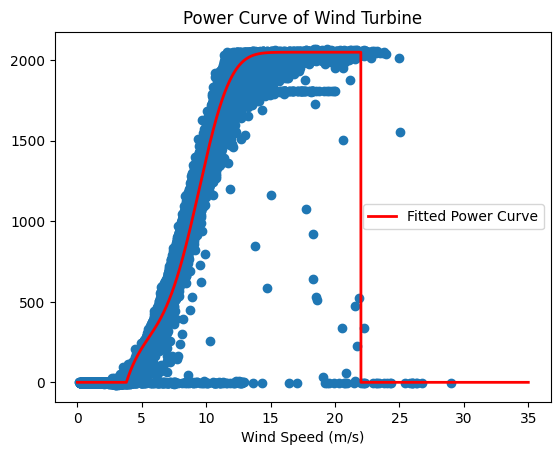

In [31]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Wind speed (m/s)'], data_merged[power_var])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Wind Speed (m/s)")           # X-axis label
#plt.ylabel(f"{power_var}")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Same but for Status = Running and Event = 'Informational - System OK - System OK (32) - Full Performance'. For 2016 there are 2 major problems. One is the branch at around 1740 kW and the other one the many negative power values. Both will be investigated below

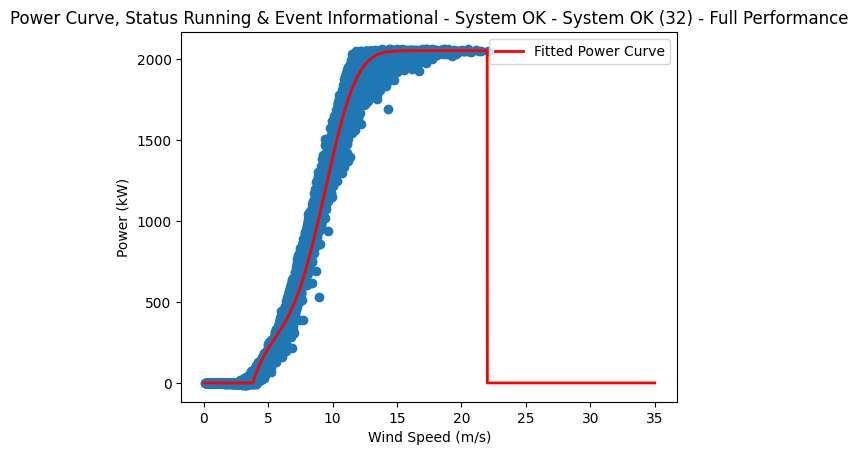

In [32]:
filtered_data = data_merged[(data_merged['Status'] == 'Running') & 
                             (data_merged['Events'] == event)]

# Plotting the filtered data
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(filtered_data['Wind speed (m/s)'], filtered_data[power_var])

# Adding title and axis labels
plt.title("Power Curve, Status Running & Event Informational - System OK - System OK (32) - Full Performance")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel(f"{power_var}")

# Show the legend
plt.legend()

Zoom into the branch at around 1740 kW

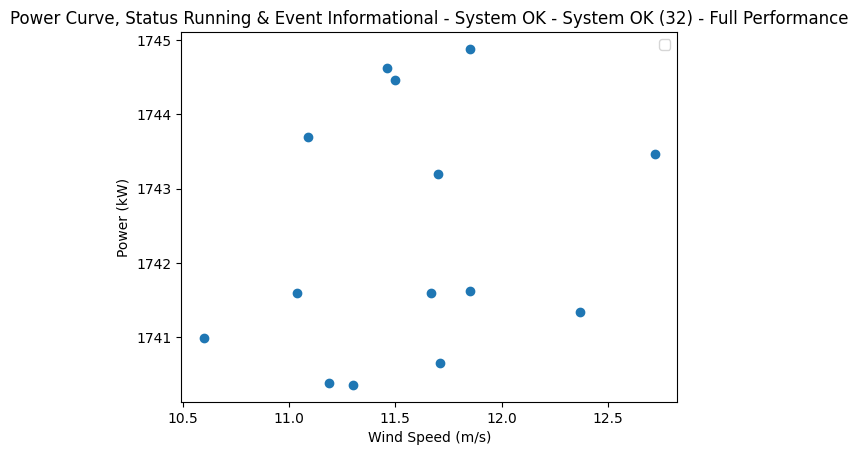

In [33]:
filtered_data_2 = filtered_data[(filtered_data['Power (kW)'] > 1740) & (filtered_data['Power (kW)'] < 1745)]

# Plotting the filtered data
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(filtered_data_2['Wind speed (m/s)'], filtered_data_2[power_var])

# Adding title and axis labels
plt.title("Power Curve, Status Running & Event Informational - System OK - System OK (32) - Full Performance")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel(f"{power_var}")

# Show the legend
plt.legend()




In [34]:
pd.set_option('display.max_columns', None)
low_speed_df = filtered_data_2[filtered_data_2['Wind speed (m/s)'] < 14]
high_speed_df = filtered_data_2[filtered_data_2['Wind speed (m/s)'] > 14]
low_speed_stats = low_speed_df.describe()
high_speed_stats = high_speed_df.describe()

print(low_speed_df.index.unique())
print(high_speed_df.index.unique())



#print(high_speed_df.index.min())
#print(high_speed_df.index.max())



## huge difference for the variables "Power, Standard deviation (kW)", "Lost Production to Performance (kWh)"
selected_columns = ["Power, Standard deviation (kW)", "Lost Production to Performance (kWh)"]
comparison = low_speed_stats.compare(high_speed_stats)

# Display only the selected columns in the comparison
display(comparison[selected_columns])

DatetimeIndex(['2018-01-06 13:20:00', '2018-01-09 10:10:00',
               '2018-01-09 13:10:00', '2018-02-01 03:40:00',
               '2018-02-01 23:40:00', '2018-02-11 13:50:00',
               '2018-02-11 15:10:00', '2018-02-11 17:50:00',
               '2018-02-15 13:00:00', '2018-02-28 20:50:00',
               '2018-02-28 22:20:00', '2018-03-17 07:50:00',
               '2018-03-18 02:10:00', '2018-03-23 10:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)


Power, Standard deviation (kW)        \
                                self other   
count                      14.000000   0.0   
mean                      305.038571   NaN   
std                        69.245019   NaN   
min                       157.539993   NaN   
25%                       261.945007   NaN   
50%                       304.054993   NaN   
75%                       349.162506   NaN   
max                       432.679993   NaN   

      Lost Production to Performance (kWh)        
                                      self other  
count                            14.000000   0.0  
mean                             10.455412   NaN  
std                              16.080365   NaN  
min                             -19.405316   NaN  
25%                              -0.598365   NaN  
50%                               7.426129   NaN  
75%                              19.904005   NaN  
max                              39.319608   NaN

#### The branch in the plot (deviation from the theoretical power curve) at Power 1741 kW are all but 2 events from 1 night 04.11.2016 - 05.11.2016. At 08:00 am on 05.11.2016 there is a warning message "Warning, 9000, P output externally reduced". Most likely the warning was issued 10 hours and 10 min late. This allows us to exclude these data points

investigate the other power variables. None seem to be useful except 'Potential power default PC (kW)' which turnns out to be really the theoretical power output of the wind turbine provider

In [35]:
#p_theoretical = 'Potential power default PC (kW)' # is very close
#p_theoretical = 'Potential power learned PC (kW)' # is not so good, has 2 branches
p_theoretical = 'Potential power reference turbines (kW)' # is not so good[
#p_theoretical = 'Potential power met mast anemometer (kW)' # is empty
#p_theoretical = 'Potential power primary reference turbines (kW)' # is not so good
#p_theoretical = 'Potential power estimated (kW)' # is empty

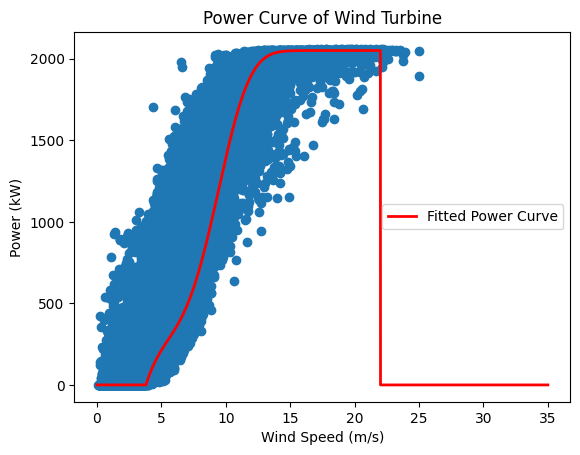

In [36]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Wind speed (m/s)'], data_merged[p_theoretical])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Wind Speed (m/s)")           # X-axis label
plt.ylabel("Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

At times where Status = Running and it is running at full performance, there is still 2221 cases where negative power is produced

In [37]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(data_merged[(data_merged['Power (kW)'] < 0) & (data_merged['Status'] == 'Running')]['Events'].value_counts())


,count
Events,
Informational - System OK - System OK (32) - Full Performance,2730
Communication - Data communication unavailable - - | Informational - System OK - System OK (32) - Full Performance,740
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,494
Warning - P output externally reduced - Warnings (27) - Partial Performance | Warning - P output externally reduced - Warnings (27) - Partial Performance,148
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,106
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,47
Communication - Data communication unavailable - - | Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,46
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,19
Informational - Absence of wind during run-up - Operating states (28) - Out of Environmental Specification,19


Explorative Analysis of the suspicious entries for full operation in particular the negative power entries

In [38]:
standard_case = data_merged[data_merged['Events'] == 'Informational - System OK - System OK (32) - Full Performance']

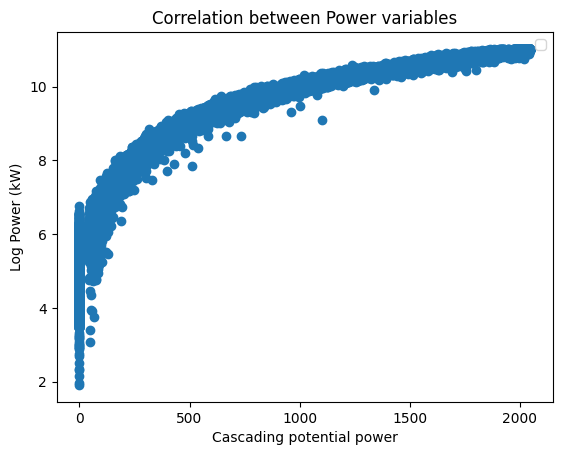

In [39]:
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(standard_case['Cascading potential power (kW)'], np.log2(standard_case['Power (kW)'] + 16))
# Adding title and axis labels
plt.title("Correlation between Power variables")  # Title above the graph
plt.xlabel("Cascading potential power")           # X-axis label
plt.ylabel("Log Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Attempt to use "Lost production"

- Lost production > 0 is <=> Status = Stop or Lost production = 0 <=> Status = Running

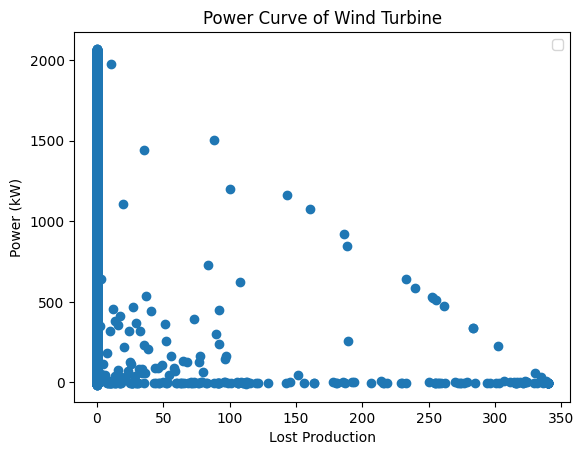

In [40]:
#plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(data_merged['Lost Production to Downtime and Curtailment Total (kWh)'], data_merged['Power (kW)'])
# Adding title and axis labels
plt.title("Power Curve of Wind Turbine")  # Title above the graph
plt.xlabel("Lost Production")           # X-axis label
plt.ylabel("Power (kW)")                 # Y-axis label

# Optional: show the legend
plt.legend()

#plt.axhline(y=600, c='green', linestyle='--')
#plt.axvline(x=8, c='green', linestyle='--')
#plt.axvline(x=12, c='green', linestyle='--')

Create a new table with 2 extra columns: 1. log power, 2. percentage deviation of power from theoretical power

In [41]:
turbine_log_powers = data_merged.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

In [42]:
turbine_log_powers["Potential power default PC (kW)"].min()

np.float64(0.0)

In [43]:
turbine_log_powers["pow_deviation"] = abs(turbine_log_powers["Power (kW)"] / (0.1 + turbine_log_powers["Potential power default PC (kW)"]) - 1)

Filter for full operation

In [44]:
events_df = turbine_log_powers[turbine_log_powers['Events'] == event]

In [45]:
rest_df = turbine_log_powers[(turbine_log_powers["pow_deviation"] > 0.2) & 
                              (turbine_log_powers['Events'] == event)] 
                              #(turbine_log_powers['Wind speed (m/s)'] >= 10) & 
                              #(turbine_log_powers['Lost Production to Performance (kWh)'] > 0)

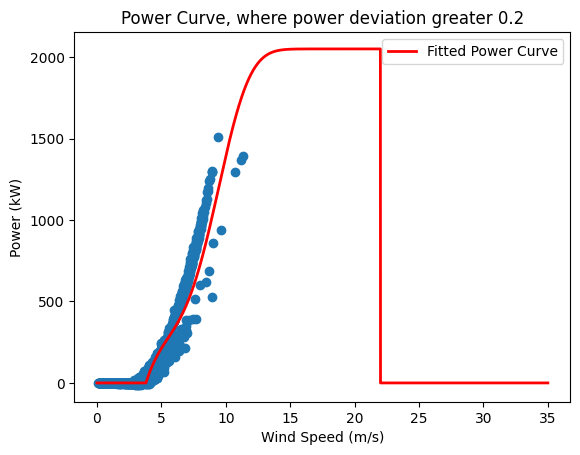

In [46]:
plt.plot(ws, fitted_power, label="Fitted Power Curve", linewidth=2, color='red')
plt.scatter(rest_df['Wind speed (m/s)'], rest_df["Power (kW)"])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.2")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")

# Show the legend
plt.legend()

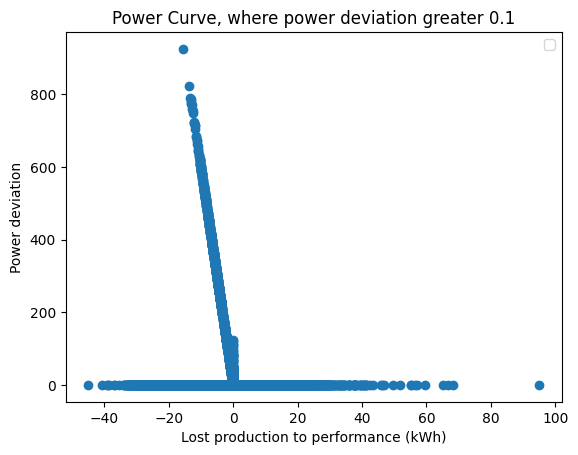

In [47]:
plt.scatter(events_df["Lost Production to Performance (kWh)"], events_df['pow_deviation'])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.1")
plt.ylabel("Power deviation")
plt.xlabel("Lost production to performance (kWh)")

# Show the legend
plt.legend()

### The lost production to performance variable: if positive power is lost hence the data points in the power curve are to the right of the theoretical curve. If negative the data points are to the left. Interestlingly, the biggest deviation from the theoretical curve occur for a lost production to performance from zero to slightly negative

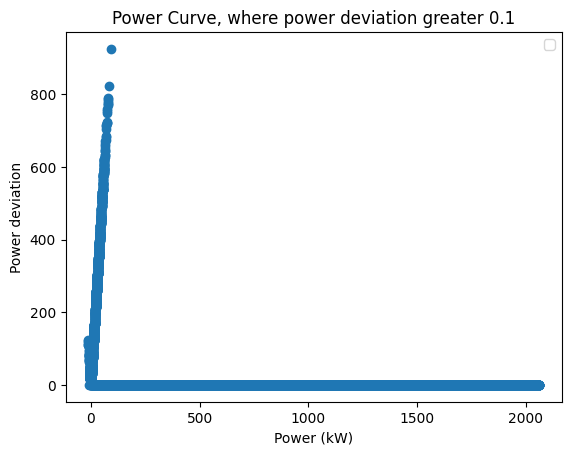

In [48]:
plt.scatter(events_df["Power (kW)"], events_df['pow_deviation'])

# Adding title and axis labels
plt.title("Power Curve, where power deviation greater 0.1")
plt.ylabel("Power deviation")
plt.xlabel("Power (kW)")

# Show the legend
plt.legend()

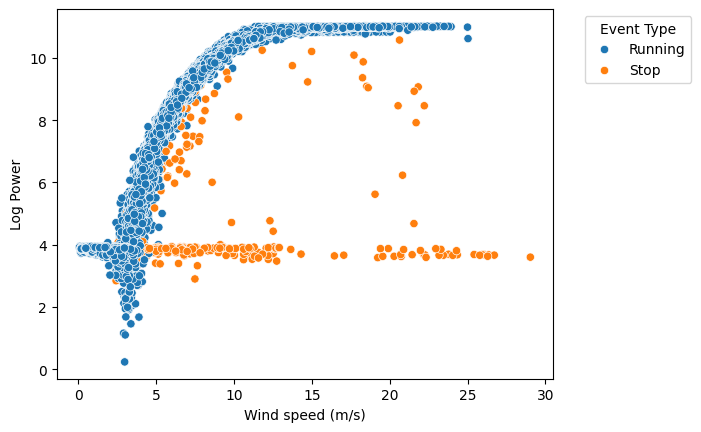

In [49]:
import seaborn as sns
# Count the occurrences of each event type

#event_counts = data_2016_electricity['Status'].value_counts()

# Choose the top N most frequent events
#top_events = event_counts.iloc[3:9].index  # Change '5' to however many events you want to display

# Filter the dataset to only include these top events
#filtered_data = data_2016_electricity[data_2016_electricity['Events'].isin(top_events)]

# Scatter plot
sns.scatterplot(x=turbine_log_powers['Wind speed (m/s)'], 
                y=turbine_log_powers['Log Power'], 
                hue=turbine_log_powers['Status'],
                )  # Optional: use a color palette

# Adjust legend
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [28]:
problematic = turbine_2016.loc[(turbine_2016['Wind speed (m/s)'] < 12) & 
                     (turbine_2016['Wind speed (m/s)'] > 8) & 
                     (turbine_2016['Power (kW)'] <= 610) &
                     (turbine_2016['Power (kW)'] >= 600),:]

NameError: name 'turbine_2016' is not defined

In [ ]:
problematic[['Wind speed (m/s)', 'Power (kW)']].hist(bins=30, figsize=(10, 5))

### Analysis of Merged Datasets

#### Frequency count of events

In [ ]:
status_running = data_2016_electricity[data_2016_electricity['Status'] == 'Running']
# Frequency of "Events" Combinations for Status = Running
running_event_counts = status_running['Events'].value_counts()
pd.DataFrame(running_event_counts)

#### Relationship between Wind Speed and Power Output with Event Categories

In [ ]:
data_2016_electricity.loc[~data_2016_electricity.Events.fillna("").str.startswith("Informational - System OK"), :]

In [ ]:
import seaborn as sns
# Count the occurrences of each event type

event_counts = data_2016_electricity['Events'].value_counts()

# Choose the top N most frequent events
top_events = event_counts.iloc[3:9].index  # Change '5' to however many events you want to display

# Filter the dataset to only include these top events
filtered_data = data_2016_electricity[data_2016_electricity['Events'].isin(top_events)]

# Scatter plot
sns.scatterplot(x=filtered_data['Wind speed (m/s)'], 
                y=filtered_data['Power (kW)'], 
                hue=filtered_data['Events'],
                )  # Optional: use a color palette

# Adjust legend
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

#### Old

In [ ]:
sns.scatterplot(x=data_2016_electricity['Wind speed (m/s)'], y=data_2016_electricity['Power (kW)'], hue=data_2016_electricity['Events'])
# Customize legend with line breaks
handles, labels = plt.gca().get_legend_handles_labels()

# Manually replace long labels with ones that include line breaks
labels = [label.replace("Very long event name", "Very\nlong event name") for label in labels]

# Set the new labels and improve the layout
plt.legend(handles, labels, title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

#### Relationship between Wind Speed and Log Power of entire merged dataset 

In [ ]:
turbine_log_powers = data_2016_electricity.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

In [ ]:
turbine_log_powers[turbine_log_powers['Events'].str.strip() == 'Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance'.strip()]


#### Alt

In [ ]:
condition1 = turbine_log_powers['Lost Production to Downtime and Curtailment Total (kWh)'] > 0
condition2 = turbine_log_powers['Status'] == 'Stop'

In [ ]:
Events = [
    'Informational - System OK - System OK (32) - Full Performance',
    'Warning - P output externally reduced - Warnings (27) - Partial Performance',
    'Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance',
    'Informational - Parameterized P red. - Operating states (28) - | Warning - P output externally reduced - Warnings (27) - Partial Performance'
]

for i in range(0, len(Events)):
    print("Filtering for:", Events[i].strip())
    # Filter rows where the 'Events' column matches any value in the Events list
    #display(pd.DataFrame(turbine_log_powers[turbine_log_powers['Events'].str.strip() == Events[i].strip()]))
    #display(turbine_log_powers.loc[turbine_log_powers.Events.str.contains(Events[i]).fillna(False), :])
    display(turbine_log_powers.loc[turbine_log_powers.Events.fillna('').str.startswith('Informational - Parameterized P red. - Operating states \(28'), :])
    

In [ ]:
condition = event_condition[0]
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
highlighted_points = turbine_log_powers[condition]
plt.scatter(highlighted_points['Wind speed (m/s)'], highlighted_points['Log Power'], color="orange", label="Highlighted points")

In [ ]:
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
highlighted_points = turbine_log_powers[condition2]
plt.scatter(highlighted_points['Wind speed (m/s)'], highlighted_points['Log Power'], color="orange", label="Highlighted points")

#### Relationship between Wind Speed and Log Power of entire merged dataset for Status = Running

In [ ]:
merged_status_running = turbine_log_powers[turbine_log_powers["Status"] == "Running"]
plt.scatter(merged_status_running['Wind speed (m/s)'], np.log2(merged_status_running["Power (kW)"] + 16)) # log2(x + 16) = 4 for x=0 since 2^4 = 16
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.title("Relationship wind speed vs log power for Status = Running")
plt.annotate("Power = 0", [10, 4.5])